# $Model$

## Using the titanic data:



### imports

In [1]:
# General DS Imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import acquire
import prepare

np.random.seed(9)

In [119]:
# Decision Tree and Model Evaluation Imports
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

### Acquire

In [3]:
titanic_df =acquire.new_titanic_data()

### Prepare

In [4]:
titanic_df=prepare.prep_titanic(titanic_df)

In [5]:
titanic_df.head()

,survived,sex,age,sibsp,parch,fare,class,embark_town,alone,sex_male,class_Second,class_Third,embark_town_Queenstown,embark_town_Southampton
0,0,male,22.0,1,0,7.2500,Third,Southampton,0,1,0,1,0,1
1,1,female,38.0,1,0,71.2833,First,Cherbourg,0,0,0,0,0,0
2,1,female,26.0,0,0,7.9250,Third,Southampton,1,0,0,1,0,1
3,1,female,35.0,1,0,53.1000,First,Southampton,0,0,0,0,0,1
4,0,male,35.0,0,0,8.0500,Third,Southampton,1,1,0,1,0,1


In [6]:
titanic_processing_df = titanic_df.drop(columns={'sex','class', 'embark_town'})

In [7]:
titanic_processing_df.head()

,survived,age,sibsp,parch,fare,alone,sex_male,class_Second,class_Third,embark_town_Queenstown,embark_town_Southampton
0,0,22.0,1,0,7.2500,0,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0,0
2,1,26.0,0,0,7.9250,1,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,0,0,0,1
4,0,35.0,0,0,8.0500,1,1,0,1,0,1


In [8]:
titanic_processing_df.columns

Index(['survived', 'age', 'sibsp', 'parch', 'fare', 'alone', 'sex_male',
       'class_Second', 'class_Third', 'embark_town_Queenstown',
       'embark_town_Southampton'],
      dtype='object')

In [9]:
# Splitting dataset into X and y components before doing the train/validate/test split
X = titanic_processing_df[['age', 'sibsp', 'parch', 'fare', 'alone', 'sex_male',
       'class_Second', 'class_Third', 'embark_town_Queenstown',
       'embark_town_Southampton']]

y = titanic_processing_df.survived

X_train_and_validate, X_test, y_train_and_validate, y_test = train_test_split(X, y, random_state=123, test_size=.2)
X_train, X_validate, y_train, y_validate = train_test_split(X_train_and_validate, y_train_and_validate, random_state=123, test_size=.3)

In [10]:
X_train.shape, X_validate.shape,X_test.shape

((498, 10), (214, 10), (179, 10))

In [11]:
X_train, X_validate, X_test = prepare.impute_mean_age(X_train, X_validate, X_test)


In [12]:
X_train.head()

,age,sibsp,parch,fare,alone,sex_male,class_Second,class_Third,embark_town_Queenstown,embark_town_Southampton
689,15.00000,0,1,211.3375,0,0,0,0,0,1
84,17.00000,0,0,10.5000,1,0,1,0,0,1
738,29.91794,0,0,7.8958,1,1,0,1,0,1
441,20.00000,0,0,9.5000,1,1,0,1,0,1
643,29.91794,0,0,56.4958,1,1,0,1,0,1


In [13]:
y_train.head()

689    1
84     1
738    0
441    0
643    1
Name: survived, dtype: int64

### 1. What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.

In [14]:
# set target variable survived baseline
baseline = y_train.mode()
baseline

0    0
Name: survived, dtype: int64

In [15]:
X_train['baseline_prediction'] = int(baseline)
X_train

,age,sibsp,parch,fare,alone,sex_male,class_Second,class_Third,embark_town_Queenstown,embark_town_Southampton,baseline_prediction
689,15.00000,0,1,211.3375,0,0,0,0,0,1,0
84,17.00000,0,0,10.5000,1,0,1,0,0,1,0
738,29.91794,0,0,7.8958,1,1,0,1,0,1,0
441,20.00000,0,0,9.5000,1,1,0,1,0,1,0
643,29.91794,0,0,56.4958,1,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
653,29.91794,0,0,7.8292,1,0,0,1,1,0,0
20,35.00000,0,0,26.0000,1,1,1,0,0,1,0
589,29.91794,0,0,8.0500,1,1,0,1,0,1,0
514,24.00000,0,0,7.4958,1,1,0,1,0,1,0


In [16]:
actual = y_train
predictions = X_train.baseline_prediction

In [17]:
pd.crosstab(actual, predictions)

baseline_prediction,0
survived,
0,302
1,196


In [18]:
print('baseline accuracy :',(298)/(200+298))

baseline accuracy : 0.5983935742971888


In [19]:
X_train = X_train.drop(columns = ['baseline_prediction'])


In [20]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 498 entries, 689 to 281
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      498 non-null    float64
 1   sibsp                    498 non-null    int64  
 2   parch                    498 non-null    int64  
 3   fare                     498 non-null    float64
 4   alone                    498 non-null    int64  
 5   sex_male                 498 non-null    uint8  
 6   class_Second             498 non-null    uint8  
 7   class_Third              498 non-null    uint8  
 8   embark_town_Queenstown   498 non-null    uint8  
 9   embark_town_Southampton  498 non-null    uint8  
dtypes: float64(2), int64(3), uint8(5)
memory usage: 25.8 KB


### 2. Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)


In [21]:
# Create the decision tree object and specify hyperparams
tree_1 = DecisionTreeClassifier(max_depth = 5,min_samples_split = 5)

In [22]:
tree_1.fit(X_train, y_train)

# Rudimentary visualization of model structure
print(export_text(tree_1, feature_names=X_train.columns.tolist()))

|--- sex_male <= 0.50
|   |--- class_Third <= 0.50
|   |   |--- age <= 2.50
|   |   |   |--- class: 0
|   |   |--- age >  2.50
|   |   |   |--- fare <= 26.12
|   |   |   |   |--- sibsp <= 0.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- sibsp >  0.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- fare >  26.12
|   |   |   |   |--- class: 1
|   |--- class_Third >  0.50
|   |   |--- embark_town_Southampton <= 0.50
|   |   |   |--- age <= 30.21
|   |   |   |   |--- fare <= 15.37
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- fare >  15.37
|   |   |   |   |   |--- class: 1
|   |   |   |--- age >  30.21
|   |   |   |   |--- class: 0
|   |   |--- embark_town_Southampton >  0.50
|   |   |   |--- fare <= 17.60
|   |   |   |   |--- fare <= 10.82
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- fare >  10.82
|   |   |   |   |   |--- class: 1
|   |   |   |--- fare >  17.60
|   |   |   |   |--- age <= 33.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- age >  

In [23]:
# Use the model
# We'll evaluate the model's performance on train, first
y_predictions = tree_1.predict(X_train)

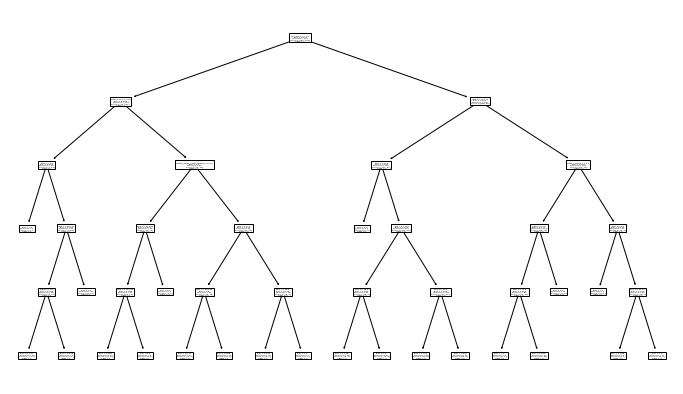

In [24]:
# Visualize the tree
plt.figure(figsize=(12, 7))
plot_tree(tree_1, feature_names=X_train.columns, class_names=['0','1'])
plt.show()

### 3. Evaluate your in-sample results using the model score, confusion matrix, and classification report.


In [25]:
predictions = tree_1.predict(X_train)
actual = y_train

In [26]:
pd.crosstab(actual, predictions)

col_0,0,1
survived,,
0,289,13
1,67,129


In [27]:
print(classification_report(actual, predictions))

              precision    recall  f1-score   support

           0       0.81      0.96      0.88       302
           1       0.91      0.66      0.76       196

    accuracy                           0.84       498
   macro avg       0.86      0.81      0.82       498
weighted avg       0.85      0.84      0.83       498



### 4. Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.


In [28]:
TN, FP, FN, TP = confusion_matrix(y_train, y_predictions).ravel()
TN, FP, FN, TP 

(289, 13, 67, 129)

In [29]:
# create crosstab from tree_1 model after train
pd.crosstab(actual, predictions)

col_0,0,1
survived,,
0,289,13
1,67,129


In [30]:
# look at accuracy of tree_1 Model
print(classification_report(actual, predictions))

              precision    recall  f1-score   support

           0       0.81      0.96      0.88       302
           1       0.91      0.66      0.76       196

    accuracy                           0.84       498
   macro avg       0.86      0.81      0.82       498
weighted avg       0.85      0.84      0.83       498



### Accuracy is 0.84 for tree_1 Model

### 5.Run through steps 2-4 using a different max_depth value.


In [31]:
# Create the decision tree object and specify hyperparams
tree_2 = DecisionTreeClassifier(max_depth = 7,min_samples_split = 13)

In [32]:
tree_2.fit(X_train, y_train)

# Rudimentary visualization of model structure
print(export_text(tree_2, feature_names=X_train.columns.tolist()))

|--- sex_male <= 0.50
|   |--- class_Third <= 0.50
|   |   |--- age <= 2.50
|   |   |   |--- class: 0
|   |   |--- age >  2.50
|   |   |   |--- fare <= 26.12
|   |   |   |   |--- sibsp <= 0.50
|   |   |   |   |   |--- age <= 24.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- age >  24.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- sibsp >  0.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- fare >  26.12
|   |   |   |   |--- class: 1
|   |--- class_Third >  0.50
|   |   |--- embark_town_Southampton <= 0.50
|   |   |   |--- age <= 30.21
|   |   |   |   |--- fare <= 15.37
|   |   |   |   |   |--- alone <= 0.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- alone >  0.50
|   |   |   |   |   |   |--- fare <= 7.68
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- fare >  7.68
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- fare >  15.37
|   |   |   |   |   |--- class: 1
|   |   |   |--- age >  30.21
|  

In [33]:
# model predictions using tree
tree_2.predict(X_train)

array([1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,

In [34]:
predictions = tree_2.predict(X_train)
actual = y_train

In [35]:
# create crosstab from tree_1 model after train
pd.crosstab(actual, predictions)

col_0,0,1
survived,,
0,283,19
1,39,157


In [36]:
# look at accuracy of tree_2 Model
print(classification_report(actual, predictions))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91       302
           1       0.89      0.80      0.84       196

    accuracy                           0.88       498
   macro avg       0.89      0.87      0.88       498
weighted avg       0.88      0.88      0.88       498



### Accuracy for tree_2 Model is 0.88

### 6. Which model performs better on your in-sample data?


Tree_2 Model performed slightly better by 4%.


### 7. Which model performs best on your out-of-sample data, the validate set?

In [37]:
predictions = tree_1.predict(X_validate)
actual = y_validate

print(classification_report(actual, predictions))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89       133
           1       0.92      0.68      0.78        81

    accuracy                           0.86       214
   macro avg       0.87      0.82      0.84       214
weighted avg       0.86      0.86      0.85       214



In [38]:
predictions = tree_2.predict(X_validate)
actual = y_validate

print(classification_report(actual, predictions))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85       133
           1       0.76      0.72      0.74        81

    accuracy                           0.81       214
   macro avg       0.80      0.79      0.79       214
weighted avg       0.81      0.81      0.81       214



### In terms of accuracy tree_1 Model performed better by 5%.

# Test Data

In [39]:
predictions = tree_1.predict(X_test)
actual = y_test

print(classification_report(actual, predictions))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90       114
           1       0.87      0.74      0.80        65

    accuracy                           0.87       179
   macro avg       0.87      0.84      0.85       179
weighted avg       0.87      0.87      0.86       179



### Tree_1 Model had an 87% accuracy in test data

# Work through these same exercises using the Telco dataset.
## Experiment with this model on other datasets with a higher number of output classes.

### Acquire

In [40]:
telco_df =acquire.new_telco_data()

In [41]:
telco_df=prepare.prep_telco(telco_df)

In [42]:
telco_df.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,contract_type_Month-to-month,contract_type_One year,contract_type_Two year,internet_service_type_DSL,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Bank transfer (automatic),payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,...,0,1,0,1,0,0,0,0,0,1
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,...,1,0,0,1,0,0,0,0,0,1
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,No,...,1,0,0,0,1,0,0,0,1,0
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,No,Yes,...,1,0,0,0,1,0,0,0,1,0
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,No,No,...,1,0,0,0,1,0,0,0,0,1


In [43]:
telco_df.columns

Index(['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents',
       'tenure', 'phone_service', 'multiple_lines', 'online_security',
       'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies', 'paperless_billing', 'monthly_charges',
       'total_charges', 'churn', 'contract_type', 'internet_service_type',
       'payment_type', 'gender_Female', 'gender_Male', 'partner_No',
       'partner_Yes', 'dependents_No', 'dependents_Yes', 'phone_service_No',
       'phone_service_Yes', 'multiple_lines_No',
       'multiple_lines_No phone service', 'multiple_lines_Yes',
       'online_security_No', 'online_security_No internet service',
       'online_security_Yes', 'online_backup_No',
       'online_backup_No internet service', 'online_backup_Yes',
       'device_protection_No', 'device_protection_No internet service',
       'device_protection_Yes', 'tech_support_No',
       'tech_support_No internet service', 'tech_support_Yes',
       

In [44]:
telco_process = telco_df.drop(columns={'customer_id','gender','partner',
                                    'dependents',
                                    'phone_service',
                                    'multiple_lines',
                                    'online_security',
                                    'online_backup',
                                    'device_protection', 
                                    'tech_support',
                                    'streaming_tv',
                                    'streaming_movies',
                                    'paperless_billing',  
                                    'contract_type',
                                    'internet_service_type',
                                    'payment_type',
                                      'churn',
                                       'churn_No'})

In [45]:
telco_process.columns.to_list()

['senior_citizen',
 'tenure',
 'monthly_charges',
 'total_charges',
 'gender_Female',
 'gender_Male',
 'partner_No',
 'partner_Yes',
 'dependents_No',
 'dependents_Yes',
 'phone_service_No',
 'phone_service_Yes',
 'multiple_lines_No',
 'multiple_lines_No phone service',
 'multiple_lines_Yes',
 'online_security_No',
 'online_security_No internet service',
 'online_security_Yes',
 'online_backup_No',
 'online_backup_No internet service',
 'online_backup_Yes',
 'device_protection_No',
 'device_protection_No internet service',
 'device_protection_Yes',
 'tech_support_No',
 'tech_support_No internet service',
 'tech_support_Yes',
 'streaming_tv_No',
 'streaming_tv_No internet service',
 'streaming_tv_Yes',
 'streaming_movies_No',
 'streaming_movies_No internet service',
 'streaming_movies_Yes',
 'paperless_billing_No',
 'paperless_billing_Yes',
 'churn_Yes',
 'contract_type_Month-to-month',
 'contract_type_One year',
 'contract_type_Two year',
 'internet_service_type_DSL',
 'internet_servic

In [46]:
# drop customer_id,gender,  
telco_process.dtypes 

senior_citizen                              int64
tenure                                      int64
monthly_charges                           float64
total_charges                             float64
gender_Female                               uint8
gender_Male                                 uint8
partner_No                                  uint8
partner_Yes                                 uint8
dependents_No                               uint8
dependents_Yes                              uint8
phone_service_No                            uint8
phone_service_Yes                           uint8
multiple_lines_No                           uint8
multiple_lines_No phone service             uint8
multiple_lines_Yes                          uint8
online_security_No                          uint8
online_security_No internet service         uint8
online_security_Yes                         uint8
online_backup_No                            uint8
online_backup_No internet service           uint8


In [47]:
telco_process.shape

(7043, 46)

In [48]:
# Splitting dataset into X and y components before doing the train/validate/test split
X = telco_process[['senior_citizen',
 'tenure',
 'monthly_charges',
 'total_charges',
 'gender_Female',
 'gender_Male',
 'partner_No',
 'partner_Yes',
 'dependents_No',
 'dependents_Yes',
 'phone_service_No',
 'phone_service_Yes',
 'multiple_lines_No',
 'multiple_lines_No phone service',
 'multiple_lines_Yes',
 'online_security_No',
 'online_security_No internet service',
 'online_security_Yes',
 'online_backup_No',
 'online_backup_No internet service',
 'online_backup_Yes',
 'device_protection_No',
 'device_protection_No internet service',
 'device_protection_Yes',
 'tech_support_No',
 'tech_support_No internet service',
 'tech_support_Yes',
 'streaming_tv_No',
 'streaming_tv_No internet service',
 'streaming_tv_Yes',
 'streaming_movies_No',
 'streaming_movies_No internet service',
 'streaming_movies_Yes',
 'paperless_billing_No',
 'paperless_billing_Yes',
 'contract_type_Month-to-month',
 'contract_type_One year',
 'contract_type_Two year',
 'internet_service_type_DSL',
 'internet_service_type_Fiber optic',
 'internet_service_type_None',
 'payment_type_Bank transfer (automatic)',
 'payment_type_Credit card (automatic)',
 'payment_type_Electronic check',
 'payment_type_Mailed check']]

y = telco_process.churn_Yes

X_train_and_validate, X_test, y_train_and_validate, y_test = train_test_split(X, y, random_state=123, test_size=.2)
X_train, X_validate, y_train, y_validate = train_test_split(X_train_and_validate, y_train_and_validate, random_state=123, test_size=.3)

In [49]:
X_train, X_validate, X_test = prepare.impute_mean_total_charges(X_train, X_validate, X_test)

In [50]:
X_train.shape, X_validate.shape,X_test.shape

((3943, 45), (1691, 45), (1409, 45))

In [51]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3943 entries, 4604 to 6958
Data columns (total 45 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   senior_citizen                          3943 non-null   int64  
 1   tenure                                  3943 non-null   int64  
 2   monthly_charges                         3943 non-null   float64
 3   total_charges                           3943 non-null   float64
 4   gender_Female                           3943 non-null   uint8  
 5   gender_Male                             3943 non-null   uint8  
 6   partner_No                              3943 non-null   uint8  
 7   partner_Yes                             3943 non-null   uint8  
 8   dependents_No                           3943 non-null   uint8  
 9   dependents_Yes                          3943 non-null   uint8  
 10  phone_service_No                        3943 non-null   u

In [52]:
X_train.head(), y_train.head()

(      senior_citizen  tenure  monthly_charges  total_charges  gender_Female  \
 4604               0       6            20.65         109.30              0   
 5566               0      33            53.75        1857.30              1   
 6204               1      65           105.85        6725.50              1   
 5837               0      22            80.00        1706.45              1   
 1276               0      64            90.60        5817.45              1   
 
       gender_Male  partner_No  partner_Yes  dependents_No  dependents_Yes  \
 4604            1           1            0              1               0   
 5566            0           0            1              1               0   
 6204            0           0            1              1               0   
 5837            0           0            1              1               0   
 1276            0           0            1              0               1   
 
       ...  contract_type_Month-to-month  contra

### 1. What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.

In [53]:
# 0 is the largest value count which represents customers who have not churn
y_train.value_counts()[0]

2893

In [54]:
baseline = y_train.value_counts()[0]/(y_train.value_counts()[0]+y_train.value_counts()[1])
print('baseline accuracy:',baseline)

baseline accuracy: 0.7337053005325894


### 2. Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

In [55]:
# Create the decision tree object and specify hyperparams
tree_1 = DecisionTreeClassifier(max_depth = 3,min_samples_split = 5)

tree_1.fit(X_train, y_train)

# Rudimentary visualization of model structure
print(export_text(tree_1, feature_names=X_train.columns.tolist()))

|--- contract_type_Month-to-month <= 0.50
|   |--- monthly_charges <= 92.42
|   |   |--- online_security_No <= 0.50
|   |   |   |--- class: 0
|   |   |--- online_security_No >  0.50
|   |   |   |--- class: 0
|   |--- monthly_charges >  92.42
|   |   |--- total_charges <= 6586.10
|   |   |   |--- class: 0
|   |   |--- total_charges >  6586.10
|   |   |   |--- class: 0
|--- contract_type_Month-to-month >  0.50
|   |--- internet_service_type_Fiber optic <= 0.50
|   |   |--- tenure <= 5.50
|   |   |   |--- class: 0
|   |   |--- tenure >  5.50
|   |   |   |--- class: 0
|   |--- internet_service_type_Fiber optic >  0.50
|   |   |--- tenure <= 8.50
|   |   |   |--- class: 1
|   |   |--- tenure >  8.50
|   |   |   |--- class: 0



In [56]:
# Use the model
# We'll evaluate the model's performance on train, first
y_predictions = tree_1.predict(X_train)

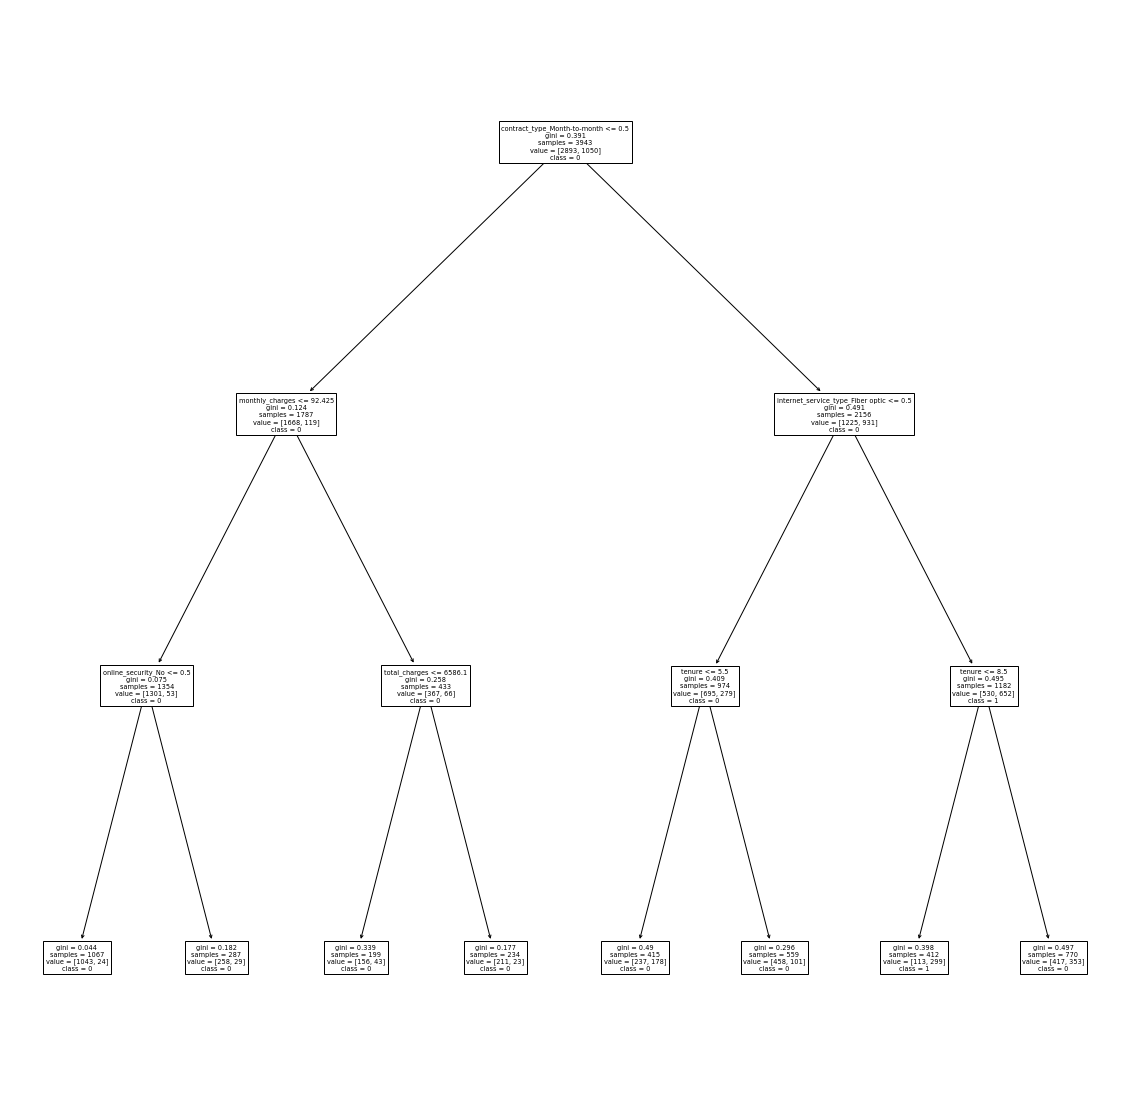

In [57]:
# Visualize the tree
plt.figure(figsize=(20, 20))
plot_tree(tree_1, feature_names=X_train.columns, class_names=['0','1'])
plt.show()

### 3. Evaluate your in-sample results using the model score, confusion matrix, and classification report.

In [58]:
print('Accuracy of tree_1:',tree_1.score(X_train, y_train))

Accuracy of tree_1: 0.780877504438245


/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


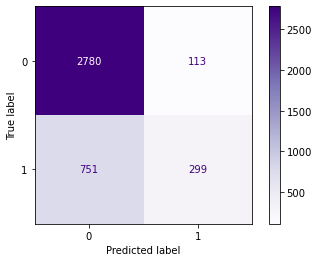

In [59]:
plot_confusion_matrix(tree_1, X_train, y_train, cmap='Purples')

In [60]:
print(classification_report(y_train, y_predictions))

              precision    recall  f1-score   support

           0       0.79      0.96      0.87      2893
           1       0.73      0.28      0.41      1050

    accuracy                           0.78      3943
   macro avg       0.76      0.62      0.64      3943
weighted avg       0.77      0.78      0.74      3943



In [61]:
# Produce the classification report on the actual y values and this model's predicted y values
report = classification_report(y_train, y_predictions, output_dict=True)
print("Tree of max_depth = 3,min_samples_split = 5")
pd.DataFrame(report)

Tree of max_depth = 3,min_samples_split = 5


,0,1,accuracy,macro avg,weighted avg
precision,0.787312,0.725728,0.780878,0.756520,0.770913
recall,0.960940,0.284762,0.780878,0.622851,0.780878
f1-score,0.865504,0.409029,0.780878,0.637267,0.743947
support,2893.000000,1050.000000,0.780878,3943.000000,3943.000000


### 4. Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

Create a confusion matrix

* True Positive: number of occurrences where y is true and y is predicted true.
* True Negative: number of occurrences where y is false and y is predicted false.
* False Positive: number of occurrences where y is false and y is predicted true.
* False Negative: number of occurrences where y is true and y is predicted false.

In [62]:
TN, FP, FN, TP = confusion_matrix(y_train, y_predictions).ravel()
print(f'True Negative: {TN}')
print(f'False Positive: {FP}')
print(f'False Negative:  {FN}')
print(f'True Positive: {TP}')


True Negative: 2780
False Positive: 113
False Negative:  751
True Positive: 299


In [63]:
 confusion_matrix(y_train, y_predictions)

array([[2780,  113],
       [ 751,  299]])

In [64]:
negative_cases = TN + FP
positive_cases = FN + TP
print(f"Negative Cases: {negative_cases}")
print(f"Positive Cases: {positive_cases}")
print(y_train.value_counts())

Negative Cases: 2893
Positive Cases: 1050
0    2893
1    1050
Name: churn_Yes, dtype: int64


### churn_Yes (1) is the positive case

In [65]:
# look at classification report of tree_1 Model
print(classification_report(actual, predictions))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90       114
           1       0.87      0.74      0.80        65

    accuracy                           0.87       179
   macro avg       0.87      0.84      0.85       179
weighted avg       0.87      0.87      0.86       179



In [66]:
ALL = TP + FP + FN + TN

accuracy = (TP + TN)/ALL

true_positive_rate = sensitivity = recall = power = TP/(TP+FN)

false_positive_rate = false_alarm_ratio = fallout = FP/(FP+TN)

true_negative_rate = specificity = selectivity = TN/(TN+FP)

false_negative_rate = miss_rate = FN/(FN+TP)

precision = PPV = TP/(TP+FP)

f1_score = 2*(precision*recall)/(precision+recall)

support_pos = TP + FN

support_neg = FP + TN



In [67]:
print(f"Accuracy: {accuracy}", '\n')
print(f"True Positive Rate/Sensitivity/Recall/Power: {true_positive_rate}", '\n')
print(f"False Positive Rate/False Alarm Ratio/Fall-out: {false_positive_rate}", '\n')
print(f"True Negative Rate/Specificity/Selectivity: {true_negative_rate}", '\n')
print(f"False Negative Rate/Miss Rate: {false_negative_rate}", '\n')
print(f"Precision/PPV: {precision}", '\n')
print(f"F1 Score: {f1_score}", '\n')
print(f"Support (0): {support_neg}", '\n')
print(f"Support (1): {support_pos}")

Accuracy: 0.780877504438245 

True Positive Rate/Sensitivity/Recall/Power: 0.28476190476190477 

False Positive Rate/False Alarm Ratio/Fall-out: 0.03905979951607328 

True Negative Rate/Specificity/Selectivity: 0.9609402004839267 

False Negative Rate/Miss Rate: 0.7152380952380952 

Precision/PPV: 0.7257281553398058 

F1 Score: 0.40902872777017785 

Support (0): 2893 

Support (1): 1050


### 5. Run through steps 2-4 using a different max_depth value.

In [68]:
# Let's get loopy
for i in range(1, 21):
    # Make the model
    tree = DecisionTreeClassifier(max_depth=i,min_samples_split = 5, random_state=123)

    # Fit the model (on train and only train)
    tree = tree.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    y_predictions = tree.predict(X_train)

    # Produce the classification report on the actual y values and this model's predicted y values
    report = classification_report(y_train, y_predictions, output_dict=True)
    print(f"Tree with max depth of {i}")
    print(pd.DataFrame(report))
    print()

Tree with max depth of 1
                     0       1  accuracy    macro avg  weighted avg
precision     0.733705     0.0  0.733705     0.366853      0.538323
recall        1.000000     0.0  0.733705     0.500000      0.733705
f1-score      0.846401     0.0  0.733705     0.423201      0.621009
support    2893.000000  1050.0  0.733705  3943.000000   3943.000000

Tree with max depth of 2
                     0            1  accuracy    macro avg  weighted avg
precision     0.855849     0.551607  0.764646     0.703728      0.774831
recall        0.816799     0.620952  0.764646     0.718876      0.764646
f1-score      0.835868     0.584229  0.764646     0.710049      0.768858
support    2893.000000  1050.000000  0.764646  3943.000000   3943.000000

Tree with max depth of 3
                     0            1  accuracy    macro avg  weighted avg
precision     0.787312     0.725728  0.780878     0.756520      0.770913
recall        0.960940     0.284762  0.780878     0.622851      0.780878

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Tree with max depth of 9
                     0            1  accuracy    macro avg  weighted avg
precision     0.881105     0.818291  0.867867     0.849698      0.864378
recall        0.947805     0.647619  0.867867     0.797712      0.867867
f1-score      0.913239     0.723020  0.867867     0.818129      0.862585
support    2893.000000  1050.000000  0.867867  3943.000000   3943.000000

Tree with max depth of 10
                     0            1  accuracy    macro avg  weighted avg
precision     0.899902     0.831473  0.884352     0.865687      0.881679
recall        0.947805     0.709524  0.884352     0.828664      0.884352
f1-score      0.923232     0.765673  0.884352     0.844453      0.881275
support    2893.000000  1050.000000  0.884352  3943.000000   3943.000000

Tree with max depth of 11
                     0            1  accuracy    macro avg  weighted avg
precision     0.915807     0.849680  0.900076     0.882744      0.898198
recall        0.951262     0.759048  0.900076

In [69]:
# Let's continue getting loopy, so we can compare in-sample to out-of-sample
metrics = []

for i in range(1, 25):
    # Make the model
    tree = DecisionTreeClassifier(max_depth=i, random_state=123)

    # Fit the model (on train and only train)
    tree = tree.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = tree.score(X_train, y_train)
    
    out_of_sample_accuracy = tree.score(X_validate, y_validate)

    output = {
        "max_depth": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df

,max_depth,train_accuracy,validate_accuracy,difference
0,1,0.733705,0.738616,-0.004911
1,2,0.764646,0.755174,0.009472
2,3,0.780878,0.786517,-0.005639
3,4,0.791783,0.778829,0.012954
4,5,0.805732,0.785925,0.019806
5,6,0.817905,0.778829,0.039076
6,7,0.827035,0.777055,0.049980
7,8,0.848592,0.772324,0.076268
8,9,0.871164,0.756949,0.114216
9,10,0.892975,0.749261,0.143714


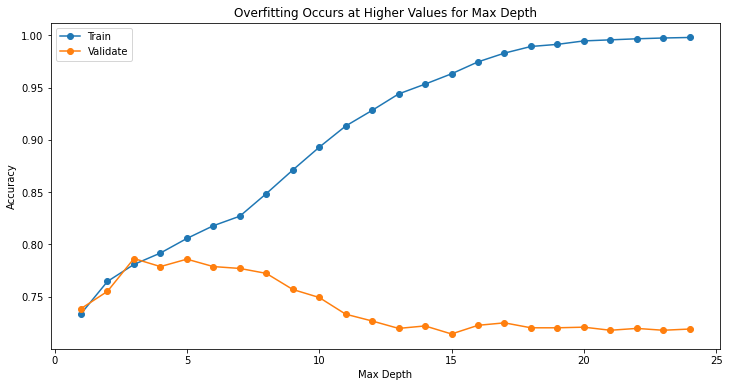

In [71]:
plt.figure(figsize=(12, 6))
plt.plot(df.max_depth, df.train_accuracy, marker = 'o', label = 'Train')
plt.plot(df.max_depth, df.validate_accuracy, marker = 'o', label = 'Validate')


#plt.plot(df_2.max_depth, df_2.validate_accuracy, marker = 'x', label = 'Validate')

plt.title('Overfitting Occurs at Higher Values for Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [72]:
# Let's continue getting loopy, so we can compare in-sample to out-of-sample
metrics = []

for i in range(1, 25):
    # Make the model
    tree = DecisionTreeClassifier(max_depth=i,min_samples_leaf= 11, random_state=123)

    # Fit the model (on train and only train)
    tree = tree.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = tree.score(X_train, y_train)
    
    out_of_sample_accuracy = tree.score(X_validate, y_validate)

    output = {
        "max_depth": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df_2 = pd.DataFrame(metrics)
df_2["difference"] = df_2.train_accuracy - df_2.validate_accuracy
df_2

,max_depth,train_accuracy,validate_accuracy,difference
0,1,0.733705,0.738616,-0.004911
1,2,0.764646,0.755174,0.009472
2,3,0.780878,0.786517,-0.005639
3,4,0.791276,0.778238,0.013038
4,5,0.803956,0.785925,0.018031
5,6,0.814101,0.777055,0.037046
6,7,0.821456,0.767593,0.053863
7,8,0.834644,0.769367,0.065276
8,9,0.841491,0.763454,0.078038
9,10,0.845549,0.762271,0.083278


# $ Random Forest$

Use titanic data:

In [73]:
titanic_df = acquire.get_titanic_data()
titanic_df

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,27.0,0,0,13.0000,S,Second,NaN,Southampton,1
887,887,1,1,female,19.0,0,0,30.0000,S,First,B,Southampton,1
888,888,0,3,female,NaN,1,2,23.4500,S,Third,NaN,Southampton,0
889,889,1,1,male,26.0,0,0,30.0000,C,First,C,Cherbourg,1


In [74]:
titanic_prep = prepare.prep_titanic(titanic_df)

In [75]:
titanic_prep.head()

,survived,sex,age,sibsp,parch,fare,class,embark_town,alone,sex_male,class_Second,class_Third,embark_town_Queenstown,embark_town_Southampton
0,0,male,22.0,1,0,7.2500,Third,Southampton,0,1,0,1,0,1
1,1,female,38.0,1,0,71.2833,First,Cherbourg,0,0,0,0,0,0
2,1,female,26.0,0,0,7.9250,Third,Southampton,1,0,0,1,0,1
3,1,female,35.0,1,0,53.1000,First,Southampton,0,0,0,0,0,1
4,0,male,35.0,0,0,8.0500,Third,Southampton,1,1,0,1,0,1


In [76]:
titanic_prep.dtypes

survived                     int64
sex                         object
age                        float64
sibsp                        int64
parch                        int64
fare                       float64
class                       object
embark_town                 object
alone                        int64
sex_male                     uint8
class_Second                 uint8
class_Third                  uint8
embark_town_Queenstown       uint8
embark_town_Southampton      uint8
dtype: object

In [77]:
titanic_prep = titanic_prep.drop(columns = {'sex', 'class','embark_town'})

In [78]:
titanic_prep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   survived                 891 non-null    int64  
 1   age                      714 non-null    float64
 2   sibsp                    891 non-null    int64  
 3   parch                    891 non-null    int64  
 4   fare                     891 non-null    float64
 5   alone                    891 non-null    int64  
 6   sex_male                 891 non-null    uint8  
 7   class_Second             891 non-null    uint8  
 8   class_Third              891 non-null    uint8  
 9   embark_town_Queenstown   891 non-null    uint8  
 10  embark_town_Southampton  891 non-null    uint8  
dtypes: float64(2), int64(4), uint8(5)
memory usage: 53.1 KB


help(prepare.train_validate_test(titanic_df,'survived'))

In [79]:
def train_validate_test_split(df, target, seed=123):
    '''
    This function takes in a dataframe, the name of the target variable
    (for stratification purposes), and an integer for a setting a seed
    and splits the data into train, validate and test. 
    Test is 20% of the original dataset, validate is .30*.80= 24% of the 
    original dataset, and train is .70*.80= 56% of the original dataset. 
    The function returns, in this order, train, validate and test dataframes. 
    '''
    train_validate, test = train_test_split(df, test_size=0.2, 
                                            random_state=seed, 
                                            stratify=df[target])
    train, validate = train_test_split(train_validate, test_size=0.3, 
                                       random_state=seed,
                                       stratify=train_validate[target])
    return train, validate, test

In [80]:
# split into train, validate, test
train, validate, test = train_validate_test_split(titanic_prep, target='survived', seed=123)

# create X & y version of train, where y is a series with just the target variable and X are all the features. 

X_train = train.drop(columns=['survived'])
y_train = train.survived

X_validate = validate.drop(columns=['survived'])
y_validate = validate.survived

X_test = test.drop(columns=['survived'])
y_test = test.survived

In [81]:
# take care of null values in age variable
X_train, X_validate, X_test = prepare.impute_mean_age(X_train, X_validate, X_test)

In [82]:
X_train.sample(10)

,age,sibsp,parch,fare,alone,sex_male,class_Second,class_Third,embark_town_Queenstown,embark_town_Southampton
160,44.000000,0,1,16.1000,0,1,0,1,0,1
618,4.000000,2,1,39.0000,0,0,1,0,0,1
658,23.000000,0,0,13.0000,1,1,1,0,0,1
890,32.000000,0,0,7.7500,1,1,0,1,1,0
358,29.678105,0,0,7.8792,1,0,0,1,1,0
480,9.000000,5,2,46.9000,0,1,0,1,0,1
589,29.678105,0,0,8.0500,1,1,0,1,0,1
306,29.678105,0,0,110.8833,1,0,0,0,0,0
557,29.678105,0,0,227.5250,1,1,0,0,0,0
13,39.000000,1,5,31.2750,0,1,0,1,0,1


In [83]:
pd.DataFrame(y_train).sample(10)

,survived
315,1
50,0
296,0
821,1
410,0
324,0
45,0
866,1
756,0
528,0


In [84]:
pd.DataFrame(y_train.value_counts())

,survived
0,307
1,191


In [85]:
baseline = y_train.mode()
baseline

0    0
Name: survived, dtype: int64

*** Baseline is set to 0 which represents not survived ***

In [86]:
X_train['baseline_prediction'] = int(baseline)


In [87]:
actual = y_train
predictions = X_train.baseline_prediction

In [88]:
pd.crosstab(actual, predictions)

baseline_prediction,0
survived,
0,307
1,191


In [89]:
X_train = X_train.drop(columns = ['baseline_prediction'])

In [90]:
X_train.columns

Index(['age', 'sibsp', 'parch', 'fare', 'alone', 'sex_male', 'class_Second',
       'class_Third', 'embark_town_Queenstown', 'embark_town_Southampton'],
      dtype='object')

### 1. Fit the Random Forest classifier to your training sample and transform (i.e. make predictions on the training sample) setting the random_state accordingly and setting min_samples_leaf = 1 and max_depth = 10.

In [91]:
random_forest = RandomForestClassifier(max_depth=10, min_samples_leaf = 1 , random_state=123)

In [92]:
random_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=123)

In [93]:
print(random_forest.feature_importances_)

[0.2137306  0.05669804 0.03244049 0.24558414 0.0170488  0.31029248
 0.02046391 0.06370967 0.01336827 0.02666359]


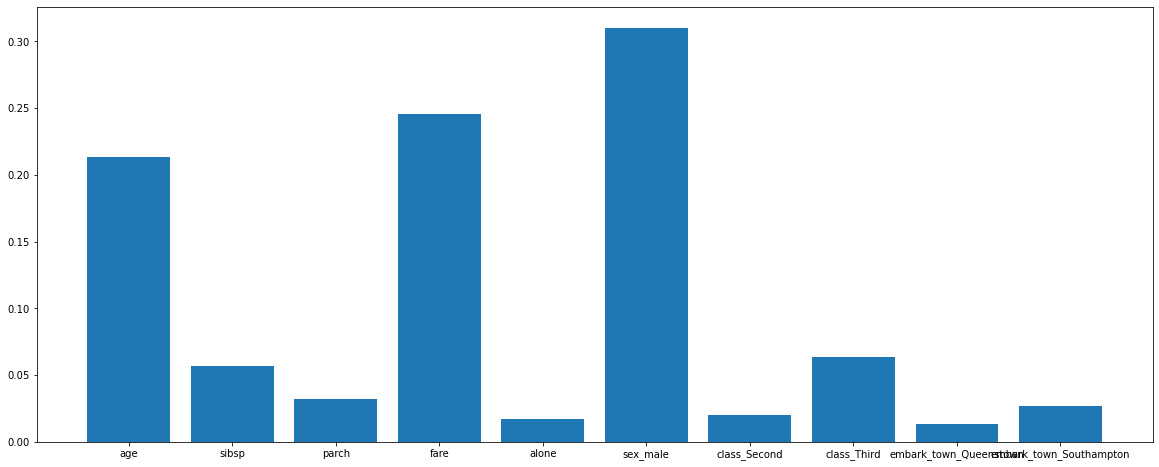

In [104]:

plt.figure(figsize=(20, 8))
plt.bar(X_train.columns, random_forest.feature_importances_)

plt.show()


* The higher number the feature importance == more important the feature.
* The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature.

In [99]:
y_pred = random_forest.predict(X_train)
y_pred

array([0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

In [108]:
# this is the match of the values to the votes
random_forest.classes_
# [0] not survived, [1] survived

array([0, 1])

In [106]:
y_pred_proba = random_forest.predict_proba(X_train)
y_pred_proba

array([[7.33692050e-01, 2.66307950e-01],
       [2.72222222e-01, 7.27777778e-01],
       [9.77857143e-01, 2.21428571e-02],
       [3.00000000e-02, 9.70000000e-01],
       [4.76190476e-04, 9.99523810e-01],
       [8.48027778e-01, 1.51972222e-01],
       [8.74651116e-01, 1.25348884e-01],
       [9.51827555e-01, 4.81724448e-02],
       [9.68362994e-01, 3.16370058e-02],
       [9.68461538e-01, 3.15384615e-02],
       [7.25598234e-01, 2.74401766e-01],
       [8.86735360e-01, 1.13264640e-01],
       [3.00000000e-02, 9.70000000e-01],
       [6.51766028e-01, 3.48233972e-01],
       [8.38846943e-01, 1.61153057e-01],
       [5.72671295e-01, 4.27328705e-01],
       [9.67467667e-01, 3.25323333e-02],
       [5.71697104e-02, 9.42830290e-01],
       [5.96083403e-01, 4.03916597e-01],
       [7.77023837e-01, 2.22976163e-01],
       [2.34991029e-01, 7.65008971e-01],
       [9.71381531e-01, 2.86184686e-02],
       [1.00000000e-02, 9.90000000e-01],
       [1.00000000e-02, 9.90000000e-01],
       [5.967582

### 2. Evaluate your results using the model score, confusion matrix, and classification report.

Evaluate model using **model score**

In [118]:
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(random_forest.score(X_train, y_train)))

Accuracy of random forest classifier on training set: 0.97


Evaluate model using **confusion matrix**

In [112]:
cm = confusion_matrix(y_train, y_pred)
print(cm)

[[307   0]
 [ 14 177]]


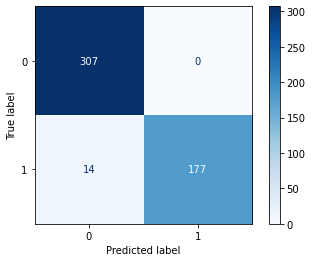

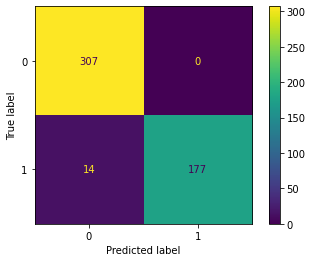

In [192]:
# disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=random_forest.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=random_forest.classes_)
disp = disp.plot(cmap=plt.cm.Blues,values_format='g')

disp.plot()


Evaluate using **classification report**

In [123]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       307
           1       1.00      0.93      0.96       191

    accuracy                           0.97       498
   macro avg       0.98      0.96      0.97       498
weighted avg       0.97      0.97      0.97       498



### 3. Print and clearly label the following: Accuracy, true positive rate, false positive rate, true nega

In [125]:
TN, FP, FN, TP = confusion_matrix(y_train, y_pred).ravel()
print(f'True Negative: {TN}')
print(f'False Positive: {FP}')
print(f'False Negative:  {FN}')
print(f'True Positive: {TP}')

True Negative: 307
False Positive: 0
False Negative:  14
True Positive: 177


In [127]:
 confusion_matrix(y_train, y_pred)

array([[307,   0],
       [ 14, 177]])

In [128]:
negative_cases = TN + FP
positive_cases = FN + TP
print(f"Negative Cases: {negative_cases}")
print(f"Positive Cases: {positive_cases}")
print(y_train.value_counts())

Negative Cases: 307
Positive Cases: 191
0    307
1    191
Name: survived, dtype: int64


In [129]:
ALL = TP + FP + FN + TN

accuracy = (TP + TN)/ALL

true_positive_rate = sensitivity = recall = power = TP/(TP+FN)

false_positive_rate = false_alarm_ratio = fallout = FP/(FP+TN)

true_negative_rate = specificity = selectivity = TN/(TN+FP)

false_negative_rate = miss_rate = FN/(FN+TP)

precision = PPV = TP/(TP+FP)

f1_score = 2*(precision*recall)/(precision+recall)

support_pos = TP + FN

support_neg = FP + TN

In [130]:
print(f"Accuracy: {accuracy}", '\n')
print(f"True Positive Rate/Sensitivity/Recall/Power: {true_positive_rate}", '\n')
print(f"False Positive Rate/False Alarm Ratio/Fall-out: {false_positive_rate}", '\n')
print(f"True Negative Rate/Specificity/Selectivity: {true_negative_rate}", '\n')
print(f"False Negative Rate/Miss Rate: {false_negative_rate}", '\n')
print(f"Precision/PPV: {precision}", '\n')
print(f"F1 Score: {f1_score}", '\n')
print(f"Support (0): {support_neg}", '\n')
print(f"Support (1): {support_pos}")

Accuracy: 0.9718875502008032 

True Positive Rate/Sensitivity/Recall/Power: 0.9267015706806283 

False Positive Rate/False Alarm Ratio/Fall-out: 0.0 

True Negative Rate/Specificity/Selectivity: 1.0 

False Negative Rate/Miss Rate: 0.07329842931937172 

Precision/PPV: 1.0 

F1 Score: 0.9619565217391305 

Support (0): 307 

Support (1): 191


### 4. Run through steps increasing your min_samples_leaf and decreasing your max_depth.

In [207]:
y_train.copy = y_train

In [212]:
y_train.copy

583    0
165    1
50     0
259    1
306    1
      ..
313    0
636    0
222    0
485    0
744    1
Name: survived, Length: 498, dtype: int64

In [144]:
# Let's get loopy

for i in range(1, 21):
  
    # Make the model
    random_forest = RandomForestClassifier(max_depth=10, min_samples_leaf = i , random_state=123)

    # Fit the model (on train and only train)
    random_forest = random_forest.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    y_pred = random_forest.predict(X_train)

    # Produce the classification report on the actual y values and this model's predicted y values
    report = classification_report(y_train, y_pred, output_dict=True)
    print(f"Tree with min sample leaf {i}")
    print(pd.DataFrame(report))
    print()
 

Tree with min sample leaf 1
                    0           1  accuracy   macro avg  weighted avg
precision    0.956386    1.000000  0.971888    0.978193      0.973114
recall       1.000000    0.926702  0.971888    0.963351      0.971888
f1-score     0.977707    0.961957  0.971888    0.969832      0.971666
support    307.000000  191.000000  0.971888  498.000000    498.000000

Tree with min sample leaf 2
                    0           1  accuracy   macro avg  weighted avg
precision    0.895522    0.957055  0.915663    0.926289      0.919122
recall       0.977199    0.816754  0.915663    0.896976      0.915663
f1-score     0.934579    0.881356  0.915663    0.907968      0.914166
support    307.000000  191.000000  0.915663  498.000000    498.000000

Tree with min sample leaf 3
                    0           1  accuracy   macro avg  weighted avg
precision    0.883582    0.932515  0.899598    0.908049      0.902350
recall       0.964169    0.795812  0.899598    0.879990      0.899598
f1-s

In [193]:
for h in range(10,0,-1):
    print(f'max depth {h}')
    for i in range(1, 21):
  
    # Make the model
        random_forest = RandomForestClassifier(max_depth=h, min_samples_leaf = i , random_state=123)

    # Fit the model (on train and only train)
        random_forest = random_forest.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
        y_pred = random_forest.predict(X_train)

    # Produce the classification report on the actual y values and this model's predicted y values
        report = classification_report(y_train, y_pred, output_dict=True)
        print(f"Tree with min sample leaf {i}")
        print(f'max depth {h}')
        print(pd.DataFrame(report))
        print()
 

max depth 10
Tree with min sample leaf 1
max depth 10
                    0           1  accuracy   macro avg  weighted avg
precision    0.956386    1.000000  0.971888    0.978193      0.973114
recall       1.000000    0.926702  0.971888    0.963351      0.971888
f1-score     0.977707    0.961957  0.971888    0.969832      0.971666
support    307.000000  191.000000  0.971888  498.000000    498.000000

Tree with min sample leaf 2
max depth 10
                    0           1  accuracy   macro avg  weighted avg
precision    0.895522    0.957055  0.915663    0.926289      0.919122
recall       0.977199    0.816754  0.915663    0.896976      0.915663
f1-score     0.934579    0.881356  0.915663    0.907968      0.914166
support    307.000000  191.000000  0.915663  498.000000    498.000000

Tree with min sample leaf 3
max depth 10
                    0           1  accuracy   macro avg  weighted avg
precision    0.883582    0.932515  0.899598    0.908049      0.902350
recall       0.964169 

Tree with min sample leaf 4
max depth 9
                    0           1  accuracy   macro avg  weighted avg
precision    0.875371    0.925466  0.891566    0.900418      0.894584
recall       0.960912    0.780105  0.891566    0.870508      0.891566
f1-score     0.916149    0.846591  0.891566    0.881370      0.889471
support    307.000000  191.000000  0.891566  498.000000    498.000000

Tree with min sample leaf 5
max depth 9
                    0           1  accuracy   macro avg  weighted avg
precision    0.855491    0.927632   0.87751    0.891561      0.883160
recall       0.964169    0.738220   0.87751    0.851195      0.877510
f1-score     0.906585    0.822157   0.87751    0.864371      0.874204
support    307.000000  191.000000   0.87751  498.000000    498.000000

Tree with min sample leaf 6
max depth 9
                    0           1  accuracy   macro avg  weighted avg
precision    0.847262    0.913907   0.86747    0.880585      0.872823
recall       0.957655    0.722513   0.

Tree with min sample leaf 8
max depth 8
                    0           1  accuracy   macro avg  weighted avg
precision    0.837607    0.911565  0.859438    0.874586      0.865972
recall       0.957655    0.701571  0.859438    0.829613      0.859438
f1-score     0.893617    0.792899  0.859438    0.843258      0.854988
support    307.000000  191.000000  0.859438  498.000000    498.000000

Tree with min sample leaf 9
max depth 8
                    0           1  accuracy   macro avg  weighted avg
precision    0.831461    0.922535   0.85743    0.876998      0.866391
recall       0.964169    0.685864   0.85743    0.825017      0.857430
f1-score     0.892911    0.786787   0.85743    0.839849      0.852209
support    307.000000  191.000000   0.85743  498.000000    498.000000

Tree with min sample leaf 10
max depth 8
                    0           1  accuracy   macro avg  weighted avg
precision    0.825000    0.927536  0.853414    0.876268      0.864326
recall       0.967427    0.670157  0.

Tree with min sample leaf 12
max depth 7
                    0           1  accuracy   macro avg  weighted avg
precision    0.814917    0.911765  0.841365    0.863341      0.852061
recall       0.960912    0.649215  0.841365    0.805063      0.841365
f1-score     0.881913    0.758410  0.841365    0.820162      0.834545
support    307.000000  191.000000  0.841365  498.000000    498.000000

Tree with min sample leaf 13
max depth 7
                    0           1  accuracy   macro avg  weighted avg
precision    0.812155    0.904412  0.837349    0.858283      0.847538
recall       0.957655    0.643979  0.837349    0.800817      0.837349
f1-score     0.878924    0.752294  0.837349    0.815609      0.830357
support    307.000000  191.000000  0.837349  498.000000    498.000000

Tree with min sample leaf 14
max depth 7
                    0           1  accuracy   macro avg  weighted avg
precision    0.819209    0.881944  0.837349    0.850577      0.843270
recall       0.944625    0.664921  

Tree with min sample leaf 16
max depth 6
                    0           1  accuracy   macro avg  weighted avg
precision    0.821023    0.876712  0.837349    0.848868      0.842382
recall       0.941368    0.670157  0.837349    0.805763      0.837349
f1-score     0.877086    0.759644  0.837349    0.818365      0.832043
support    307.000000  191.000000  0.837349  498.000000    498.000000

Tree with min sample leaf 17
max depth 6
                    0           1  accuracy   macro avg  weighted avg
precision    0.802740    0.894737  0.827309    0.848738      0.838024
recall       0.954397    0.623037  0.827309    0.788717      0.827309
f1-score     0.872024    0.734568  0.827309    0.803296      0.819305
support    307.000000  191.000000  0.827309  498.000000    498.000000

Tree with min sample leaf 18
max depth 6
                    0           1  accuracy   macro avg  weighted avg
precision    0.809392    0.897059  0.833333    0.853226      0.843015
recall       0.954397    0.638743  

Tree with min sample leaf 20
max depth 5
                    0           1  accuracy   macro avg  weighted avg
precision    0.821839    0.860000  0.833333    0.840920      0.836475
recall       0.931596    0.675393  0.833333    0.803494      0.833333
f1-score     0.873282    0.756598  0.833333    0.814940      0.828530
support    307.000000  191.000000  0.833333  498.000000    498.000000

max depth 4
Tree with min sample leaf 1
max depth 4
                    0           1  accuracy   macro avg  weighted avg
precision    0.836735    0.870968   0.84739    0.853851      0.849864
recall       0.934853    0.706806   0.84739    0.820830      0.847390
f1-score     0.883077    0.780347   0.84739    0.831712      0.843676
support    307.000000  191.000000   0.84739  498.000000    498.000000

Tree with min sample leaf 2
max depth 4
                    0           1  accuracy   macro avg  weighted avg
precision    0.837209    0.876623  0.849398    0.856916      0.852326
recall       0.938111    

Tree with min sample leaf 4
max depth 3
                    0           1  accuracy   macro avg  weighted avg
precision    0.823699    0.855263  0.833333    0.839481      0.835805
recall       0.928339    0.680628  0.833333    0.804484      0.833333
f1-score     0.872894    0.758017  0.833333    0.815456      0.828835
support    307.000000  191.000000  0.833333  498.000000    498.000000

Tree with min sample leaf 5
max depth 3
                    0           1  accuracy   macro avg  weighted avg
precision    0.828488    0.857143  0.837349    0.842816      0.839478
recall       0.928339    0.691099  0.837349    0.809719      0.837349
f1-score     0.875576    0.765217  0.837349    0.820397      0.833250
support    307.000000  191.000000  0.837349  498.000000    498.000000

Tree with min sample leaf 6
max depth 3
                    0           1  accuracy   macro avg  weighted avg
precision    0.828488    0.857143  0.837349    0.842816      0.839478
recall       0.928339    0.691099  0.8

Tree with min sample leaf 9
max depth 2
                    0           1  accuracy   macro avg  weighted avg
precision    0.801676    0.857143  0.817269    0.829409      0.822949
recall       0.934853    0.628272  0.817269    0.781563      0.817269
f1-score     0.863158    0.725076  0.817269    0.794117      0.810199
support    307.000000  191.000000  0.817269  498.000000    498.000000

Tree with min sample leaf 10
max depth 2
                    0           1  accuracy   macro avg  weighted avg
precision    0.780488    0.852713  0.799197    0.816600      0.808189
recall       0.938111    0.575916  0.799197    0.757013      0.799197
f1-score     0.852071    0.687500  0.799197    0.769786      0.788952
support    307.000000  191.000000  0.799197  498.000000    498.000000

Tree with min sample leaf 11
max depth 2
                    0           1  accuracy   macro avg  weighted avg
precision    0.779292    0.839695  0.795181    0.809493      0.802458
recall       0.931596    0.575916  0

Tree with min sample leaf 14
max depth 1
                    0           1  accuracy   macro avg  weighted avg
precision    0.768392    0.809160  0.779116    0.788776      0.784028
recall       0.918567    0.554974  0.779116    0.736770      0.779116
f1-score     0.836795    0.658385  0.779116    0.747590      0.768369
support    307.000000  191.000000  0.779116  498.000000    498.000000

Tree with min sample leaf 15
max depth 1
                    0           1  accuracy   macro avg  weighted avg
precision    0.768392    0.809160  0.779116    0.788776      0.784028
recall       0.918567    0.554974  0.779116    0.736770      0.779116
f1-score     0.836795    0.658385  0.779116    0.747590      0.768369
support    307.000000  191.000000  0.779116  498.000000    498.000000

Tree with min sample leaf 16
max depth 1
                    0           1  accuracy   macro avg  weighted avg
precision    0.766304    0.807692  0.777108    0.786998      0.782178
recall       0.918567    0.549738  

In [214]:
metrics=[]
for h in range(10,0,-1):
   
    print(f'max depth {h}')
    
    for i in range(1, 21):
  
    # Make the model
        random_forest = RandomForestClassifier(max_depth=h, min_samples_leaf = i , random_state=123)
    
    # Fit the model (on train and only train)
        random_forest.fit(X_train, y_train)
        
         # Use the model
    # We'll evaluate the model's performance on train, first
        in_sample_accuracy = random_forest.score(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
        y_pred = random_forest.predict(X_train)
        
        output = {
        "max_depth": h,
        "min_samples_leaf": i,
        "train_accuracy": in_sample_accuracy,
        #"validate_accuracy": y_pred
    }

        metrics.append(output)
        
        df = pd.DataFrame(metrics)
df
  
 


max depth 10
max depth 9
max depth 8
max depth 7
max depth 6
max depth 5
max depth 4
max depth 3
max depth 2
max depth 1


,max_depth,min_samples_leaf,train_accuracy
0,10,1,0.971888
1,10,2,0.915663
2,10,3,0.899598
3,10,4,0.893574
4,10,5,0.875502
...,...,...,...
195,1,16,0.777108
196,1,17,0.779116
197,1,18,0.777108
198,1,19,0.777108


### 5. What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

In [195]:
# differences in the train_accuracy
df

,max_depth,min_samples_leaf,train_accuracy
0,10,1,0.971888
1,10,2,0.915663
2,10,3,0.899598
3,10,4,0.893574
4,10,5,0.875502
...,...,...,...
195,1,16,0.777108
196,1,17,0.779116
197,1,18,0.777108
198,1,19,0.777108


In [203]:
df[df.train_accuracy.sort_values(ascending = False)==df.train_accuracy.max()]

/var/folders/gl/sb_qsbtn2n58skm07d4xzbwh0000gn/T/ipykernel_1920/2725386064.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df.train_accuracy.sort_values(ascending = False)==df.train_accuracy.max()]


,max_depth,min_samples_leaf,train_accuracy
0,10,1,0.971888


max_depth of 10 with a min_sample leaf of 1 was the best model in train accuracy with 96% accuracy

# After making a few models, which one has the best performance (or closest metrics) on both train and validate?

## Validate

In [205]:
# Make the model
random_forest = RandomForestClassifier(max_depth=9, min_samples_leaf = 1 , random_state=123)
    
    # Fit the model (on train and only train)
random_forest.fit(X_train, y_train)
        
print('Accuracy of random forest classifier on validate set: {:.2f}'
     .format(random_forest.score(X_validate, y_validate)))

Accuracy of random forest classifier on validate set: 0.82


In [206]:
# Make the model
random_forest = RandomForestClassifier(max_depth=10, min_samples_leaf = 1 , random_state=123)
    
    # Fit the model (on train and only train)
random_forest.fit(X_train, y_train)
        
print('Accuracy of random forest classifier on validate set: {:.2f}'
     .format(random_forest.score(X_validate, y_validate)))

Accuracy of random forest classifier on validate set: 0.82


In [210]:
metrics=[]
for h in range(10,0,-1):
   
    print(f'max depth {h}')
    
    for i in range(1, 21):
  
    # Make the model
        random_forest = RandomForestClassifier(max_depth=h, min_samples_leaf = i , random_state=123)
    
    # Fit the model (on train and only train)
        random_forest = random_forest.fit(X_train, y_train)
        
         # Use the model
    # We'll evaluate the model's performance on train, first
        in_sample_accuracy = random_forest.score(X_train, y_train)
        
    
        out_of_sample_accuracy = random_forest.score(X_validate, y_validate)


    # Use the model
    # We'll evaluate the model's performance on train, first
        y_pred = random_forest.predict(X_train)
        
        output = {
        "max_depth": h,
        "min_samples_leaf": i,
        "train_accuracy": in_sample_accuracy,
         "validate_accuracy": out_of_sample_accuracy   
      
    }

        metrics.append(output)
        
        df_2 = pd.DataFrame(metrics)



        df_2["difference"] = df_2.train_accuracy - df_2.validate_accuracy
df_2

max depth 10
max depth 9
max depth 8
max depth 7
max depth 6
max depth 5
max depth 4
max depth 3
max depth 2
max depth 1


,max_depth,min_samples_leaf,train_accuracy,validate_accuracy,difference
0,10,1,0.971888,0.822430,0.149458
1,10,2,0.915663,0.808411,0.107251
2,10,3,0.899598,0.827103,0.072496
3,10,4,0.893574,0.817757,0.075817
4,10,5,0.875502,0.808411,0.067091
...,...,...,...,...,...
195,1,16,0.777108,0.757009,0.020099
196,1,17,0.779116,0.757009,0.022107
197,1,18,0.777108,0.757009,0.020099
198,1,19,0.777108,0.757009,0.020099


In [209]:
df_2[df_2.difference.sort_values(ascending = False)==df_2.difference.max()]

/var/folders/gl/sb_qsbtn2n58skm07d4xzbwh0000gn/T/ipykernel_1920/968861629.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_2[df_2.difference.sort_values(ascending = False)==df_2.difference.max()]


,max_depth,min_samples_leaf,train_accuracy,validate_accuracy,difference
0,10,1,0.971888,0.82243,0.149458
